<a href="https://colab.research.google.com/github/yohanesnuwara/RandomCoolStuffs/blob/master/wind_placement_simul_anneal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simulated Annealing on Wind Placement

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('classic')

In [17]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=65a353aadc005b249b0b3d20ab5da809c57f7f7225ec2ecca901e70f2d50b73f
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [18]:
from bayes_opt import BayesianOptimization

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import sys
sys.path.append('/content/drive/My Drive/Shell India Wind Competition')

In [21]:
from Farm_Evaluator_Vec import *

In [86]:
turb_coords = np.loadtxt('/content/drive/My Drive/Shell India Wind Competition/turbine_loc_test.csv', delimiter=',', skiprows=1)
power_curve   =  loadPowerCurve('/content/drive/My Drive/Shell India Wind Competition/power_curve.csv')
wind_inst_freq =  binWindResourceData(r'/content/drive/My Drive/Shell India Wind Competition/wind_data_2007.csv')
n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t = preProcessing(power_curve)

turb_rad = 50

AEP = getAEP(turb_rad, turb_coords, power_curve, wind_inst_freq, 
             n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t)

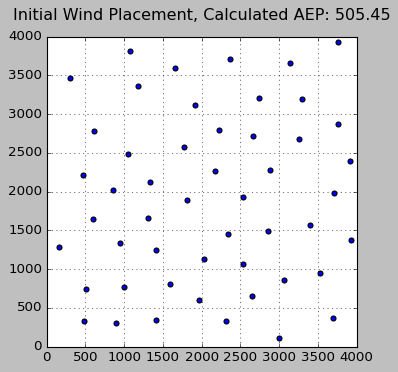

In [92]:
x = turb_coords[:,0]
y = turb_coords[:,1]

plt.figure(figsize=(5,5))
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.title('Initial Wind Placement, Calculated AEP: {}'.format(np.round(AEP, 2)), pad=15)
plt.scatter(x, y)
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

In [62]:
def obj_function(x, y):
  """
  This function randomize one of the points in the search space
  Actually pipelining to the real obj. function getAEP
  """
  turb_coords[i] = np.array([x, y])
  AEP = getAEP(turb_rad, turb_coords, power_curve, wind_inst_freq, 
               n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t)
  return AEP

Optimization happens here. This will optimize one-by-one turbine. Search space (x, y bounds) is 0 to 4000. Apply stopping criterion, e.g. AEP = 530

In [93]:
turb_coords = np.loadtxt('/content/drive/My Drive/Shell India Wind Competition/turbine_loc_test.csv', delimiter=',', skiprows=1)
stop_criterion = 530

for i in range(50):
  # Bounded region of parameter space
  pbounds = {"x": (0, 4000), "y": (0, 4000)}

  optimizer = BayesianOptimization(
      f=obj_function,
      pbounds=pbounds,
      verbose=2,  # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
      random_state=42,
  )

  print('Optimization at turbine:', i+1)
  optimizer.maximize(init_points=5, n_iter=20)

  # stopping criterion when AEP hits max value we want
  if optimizer.max['target'] >= stop_criterion:
    print('Optimization ends at turbine:', i+1)
    break

  x_reloc = optimizer.max['params']['x']
  y_reloc = optimizer.max['params']['y']
  point_reloc = np.array([x_reloc, y_reloc])
  turb_coords[i] = point_reloc

Optimization at turbine: 1
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  504.8    |  1.498e+0 |  3.803e+0 |
|  2        |  503.0    |  2.928e+0 |  2.395e+0 |
|  3        |  503.8    |  624.1    |  624.0    |
|  4        |  503.1    |  232.3    |  3.465e+0 |
|  5        |  503.3    |  2.404e+0 |  2.832e+0 |
|  6        |  505.2    |  2.255e+0 |  3.999e+0 |
|  7        |  504.9    |  1.491e+0 |  3.806e+0 |
|  8        |  504.9    |  1.385e+0 |  3.859e+0 |
|  9        |  504.9    |  1.496e+0 |  3.805e+0 |
|  10       |  505.1    |  1.46e+03 |  3.867e+0 |
|  11       |  505.0    |  1.527e+0 |  3.929e+0 |
|  12       |  505.0    |  2.174e+0 |  3.945e+0 |
|  13       |  504.4    |  2.291e+0 |  3.892e+0 |
|  14       |  504.9    |  1.605e+0 |  3.883e+0 |
|  15       |  505.2    |  2.044e+0 |  3.984e+0 |
|  16       |  504.9    |  2.034e+0 |  3.848e+0 |
|  17       |  505.0    |  1.926e+0 |  3.945e+0 |
|  18       |  505.0   

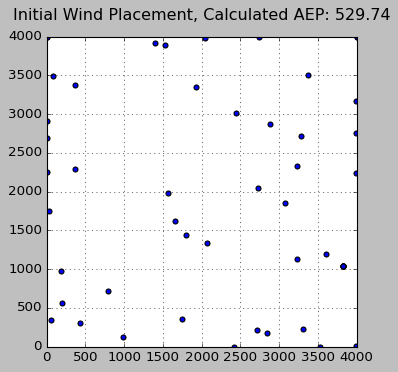

In [95]:
x = turb_coords[:,0]
y = turb_coords[:,1]
optimized_AEP = optimizer.max['target']

plt.figure(figsize=(5,5))
plt.title('Initial Wind Placement, Calculated AEP: {}'.format(np.round(optimized_AEP, 2)), pad=15)
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.scatter(x, y)
plt.grid()
plt.gca().set_aspect('equal')
plt.show()